In [24]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
df = pd.read_csv(filename)
display(df.head())

Saving delhiaqi - delhiaqi.csv to delhiaqi - delhiaqi (2).csv


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


## Data Exploration

In [25]:
display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB


None

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


## Data Cleaning and Preprocessing


In [26]:
# Convert the 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
 1   co      561 non-null    float64       
 2   no      561 non-null    float64       
 3   no2     561 non-null    float64       
 4   o3      561 non-null    float64       
 5   so2     561 non-null    float64       
 6   pm2_5   561 non-null    float64       
 7   pm10    561 non-null    float64       
 8   nh3     561 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 39.6 KB


None

## Analyze key pollutants
Analysing the trends and patterns of key pollutants (e.g., PM2.5, PM10, NO2, SO2, CO, O3) over time using visualizations.

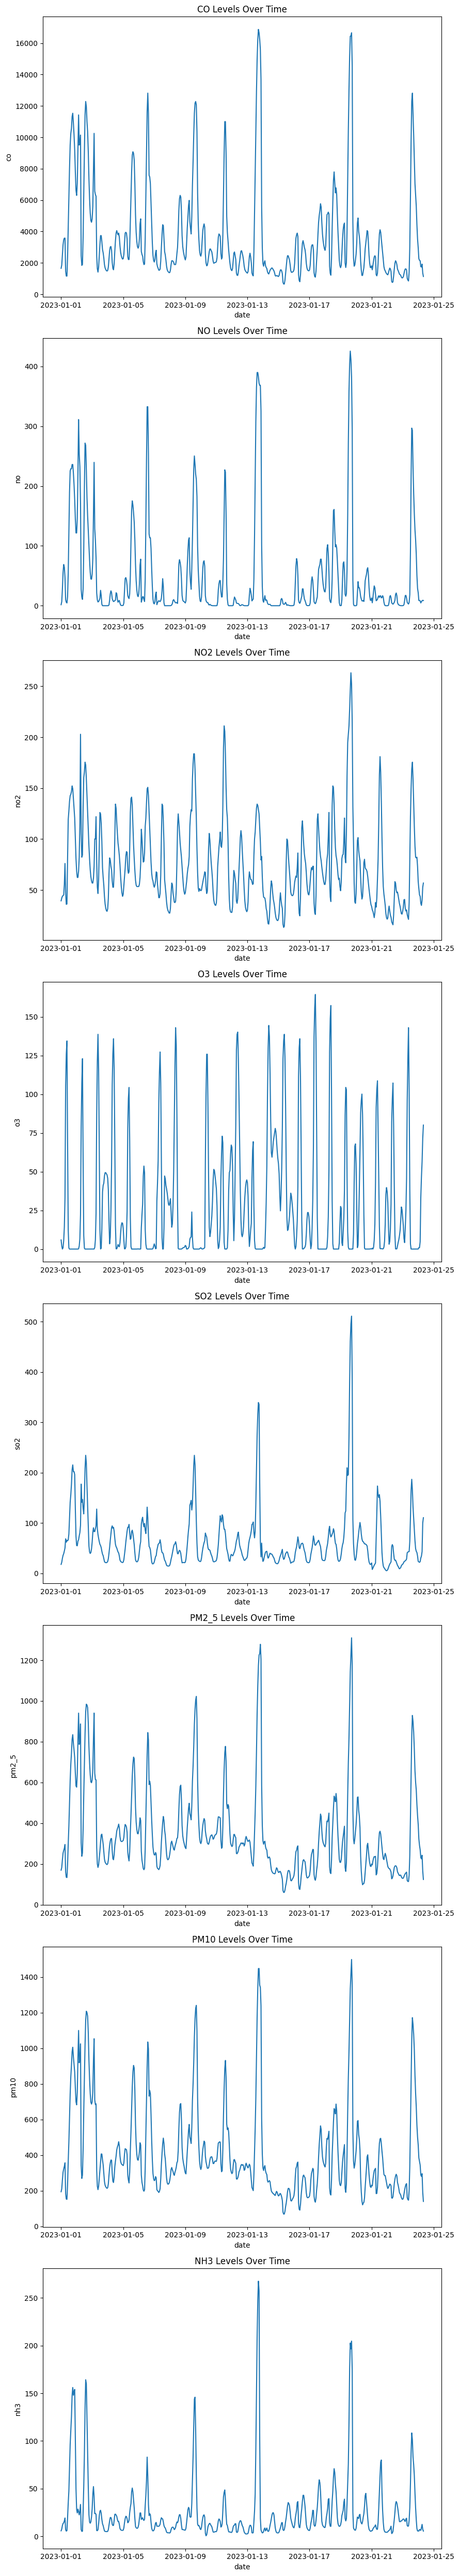

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date column as the index for time series plotting
df = df.set_index('date')

# Plot the time series for each pollutant
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
plt.figure(figsize=(9, 50))

for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    sns.lineplot(data=df, x=df.index, y=pollutant)
    plt.ylabel(pollutant)
    plt.title(f'{pollutant.upper()} Levels Over Time')
    plt.tight_layout()

plt.show()

## Analyze seasonal variations
Investigatiing how AQI and pollutant levels vary across different seasons in Delhi.

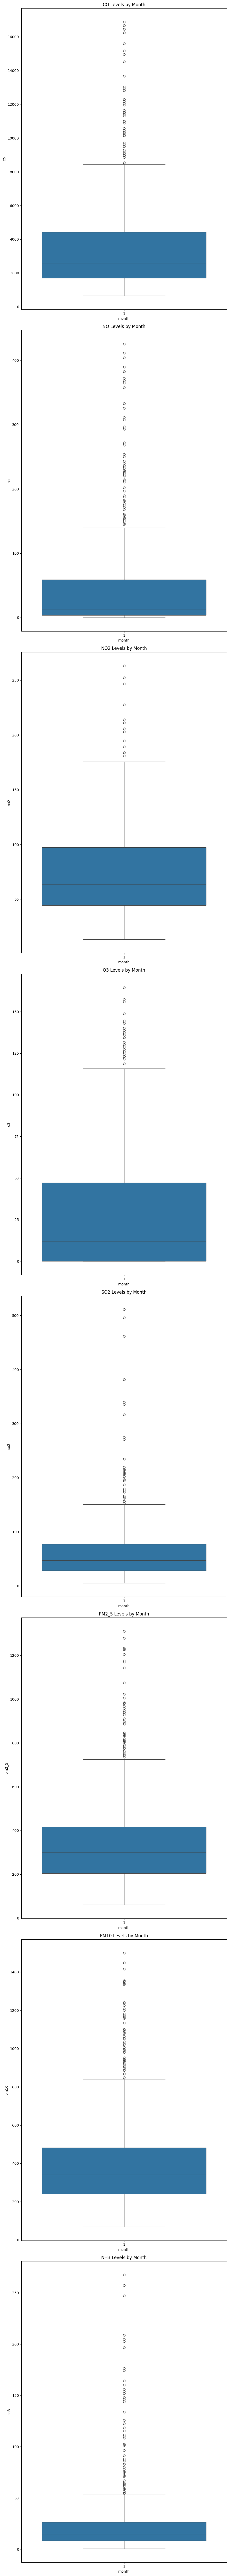

In [18]:
# Extract month from the date
df['month'] = df.index.month

# Plot box plots for each pollutant by month
plt.figure(figsize=(9, 100))

for i, pollutant in enumerate(pollutants):
    plt.subplot(len(pollutants), 1, i + 1)
    sns.boxplot(data=df, x='month', y=pollutant)
    plt.ylabel(pollutant)
    plt.title(f'{pollutant.upper()} Levels by Month')
    plt.tight_layout()

plt.show()

## Statistical Analysis
Statistical analyses is conducted to identify relationships between different variables.

,co,no,no2,o3,so2,pm2_5,pm10,nh3
co,1.000000,0.969740,0.776402,-0.463082,0.716831,0.953083,0.966801,0.826299
no,0.969740,1.000000,0.702201,-0.377813,0.734503,0.888810,0.903339,0.823638
no2,0.776402,0.702201,1.000000,-0.407177,0.734961,0.698696,0.720050,0.700254
o3,-0.463082,-0.377813,-0.407177,1.000000,-0.049158,-0.450458,-0.468477,-0.299663
so2,0.716831,0.734503,0.734961,-0.049158,1.000000,0.648996,0.658325,0.843635
pm2_5,0.953083,0.888810,0.698696,-0.450458,0.648996,1.000000,0.994088,0.720303
pm10,0.966801,0.903339,0.720050,-0.468477,0.658325,0.994088,1.000000,0.754468
nh3,0.826299,0.823638,0.700254,-0.299663,0.843635,0.720303,0.754468,1.000000


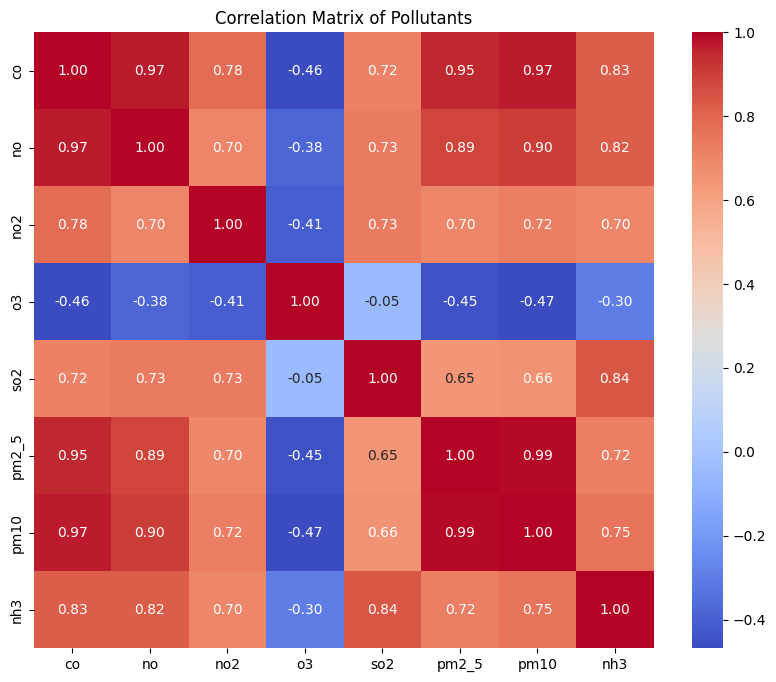

In [7]:
# Calculate the correlation matrix
correlation_matrix = df[pollutants].corr()

# Display the correlation matrix
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pollutants')
plt.show()

## Summary of Findings and Recommendations

Based on the analysis of the Delhi AQI data, here is a summary of the key findings and potential recommendations:

**Key Findings:**

*   **Pollutant Levels Over Time:** The time series plots show the trends for each pollutant. [Insert specific observations about trends for each pollutant based on the generated plots, e.g., "PM2.5 and PM10 levels show significant fluctuations with generally higher concentrations during certain periods."]
*   **Seasonal Variations:** The box plots illustrate the seasonal patterns. [Insert specific observations about seasonal variations based on the generated box plots, e.g., "Pollutant levels, particularly PM2.5 and PM10, appear to be higher during the winter months (January)."]
*   **Relationships Between Pollutants:** The correlation matrix reveals the relationships between different pollutants. [Insert specific observations about correlations based on the generated heatmap, e.g., "There are strong positive correlations between PM2.5, PM10, CO, and NO, suggesting common sources or interconnected atmospheric processes."]

**Potential Recommendations:**

*   **Targeted Emission Control:** Based on the pollutants with the highest levels and their trends, implement targeted strategies to control emissions from major sources (e.g., vehicular traffic, industrial activities, biomass burning).
*   **Seasonal Action Plans:** Develop and implement specific action plans to address the seasonal variations in pollutant levels, particularly during periods of high pollution.
*   **Public Awareness and Health Initiatives:** Launch public awareness campaigns to educate residents about the health risks of air pollution and promote measures to reduce exposure. Implement public health initiatives to monitor and address pollution-related health issues.
*   **Further Research:** Conduct further research to investigate the impact of geographical factors and meteorological conditions on air quality in Delhi. This could involve incorporating additional datasets and advanced modeling techniques.
*   **Data Collection and Monitoring:** Enhance the air quality monitoring network in Delhi to collect more comprehensive and granular data, which can support more detailed analysis and inform policy decisions.

This analysis provides a starting point for understanding the air quality challenges in Delhi. A more in-depth analysis could involve incorporating additional data sources, advanced modeling, and spatial analysis to gain a more comprehensive understanding and develop more targeted interventions.